In [1]:
from PIL import Image
import cv2
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def show_image(img_array):
    
    plt.imshow(img_array, cmap=plt.cm.gray, interpolation="nearest")
    plt.show()
    
def convert_to_bw(image_path):
    
    img_grey = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # define a threshold, 128 is the middle of black and white in grey scale
    thresh = 128

    # threshold the image
    img_binary = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]
    
    return img_binary

def resize_array(image, size=(128,128)):
    
    resized = cv2.resize(image, size, cv2.INTER_LINEAR)
    
    return resized

def image_from_array(array_data):

    image = Image.fromarray(array_data, mode='L')
    
    return image

def binary_encode(array):
    
    encoded_array = np.array(array / int(255), dtype='uint8')
    
    return encoded_array

def rebuild_binary_array(array_binary):
    
    rebuild_array = array_binary*255
    
    return rebuild_array

def scale_binary_image(array_data, factor_scale):
    
    rescaled = scipy.ndimage.zoom(array_data, zoom = factor_scale, order=0)
    
    return rescaled

def save_bin_array_to_csv(file_path, array_binary):
    return np.savetxt(file_path, array_binary, delimiter=',', fmt='%d')

def load_bin_array_from_csv(file_path):
    return np.loadtxt(file_path, delimiter=',', dtype='uint8')

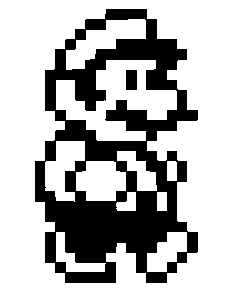

In [3]:
image = convert_to_bw("mario.jpg")
#image = convert_to_bw("doge.png")
image_from_array(image)

In [4]:
print(image)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [5]:
print(image.shape)

(295, 236)


In [24]:
resized = resize_array(image, size=(64,64))

In [25]:
print(resized.shape)

(64, 64)


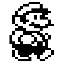

In [26]:
image_from_array(resized)

In [27]:
upscaled = resize_array(resized, size=(256,256))

In [28]:
upscaled

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

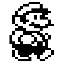

In [29]:
image_from_array(resized)

In [30]:
array_binary = binary_encode(resized)
rebuild_array = rebuild_binary_array(array_binary)

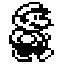

In [31]:
image_from_array(rebuild_array)

In [32]:
array_binary.shape

(64, 64)

In [33]:
rescaled2 = scale_binary_image(rebuild_array, 10)

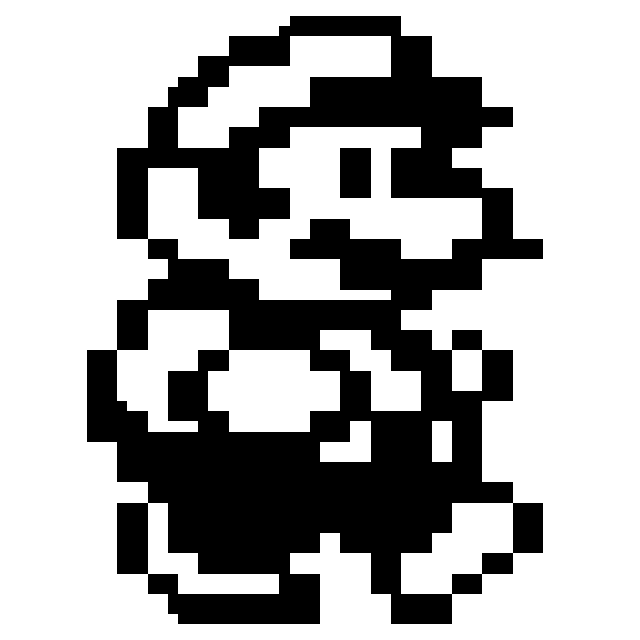

In [34]:
image_from_array(rescaled2)

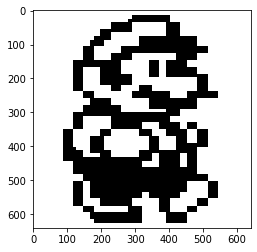

In [35]:
show_image(rescaled2)

In [36]:
save_bin_array_to_csv('mario.csv', array_binary)

In [37]:
loaded_data = load_bin_array_from_csv('mario.csv')

In [38]:
recovered_data = rebuild_binary_array(loaded_data)

In [39]:
recovered_data

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [40]:
recovered_data.shape

(64, 64)

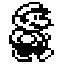

In [41]:
image_from_array(recovered_data)